## Resumo aula 1 de Machine Learning 2 ##
Separabilidade linear é um atributo importante para a maioria dos modelos de alto viés, como por exemplo, a regressão logística. Se o problema não for linearmente separável, então dificilmente obter-se-á um desempenho adequado com a utilização desses modelo mais simples. É essencial sabermos qual tipo de conjunto de dados estamos lidando, para poder determinar quais modelos testar. Isso está muito relacionado com o custo envolvido no projeto, pois testar modelos desnecessariamente pode incorrer em custos significativos para o projeto.

Como saber se um conjunto é linearmente separável?
https://tatwan.github.io/blog/python/2017/12/31/linear-separability.html#fn:3

Conhecimento de Negócio - sempre importante buscar informações com os analistas de negócios ou outros stakeholders do projeto, pessoas essas que lidam diariamente com os dados gerados pelo negócio e podem contribuir bastante com o estudo dos dados

Visualização de Dados - o método mais simples e mais claro para verificar. Nem sempre é possível de verificar unicamente em 2D como no exemplo, mas pode ser usada uma abordagem pairplot.

Geometria Computacional - um método bem parecido com que cria um "casco convexo", representando os limites de um conjunto de dados de uma determinada classe. Os conjuntos de dados serão linearmente separáveis se a intersecção de ambos for vazia

Métodos de Machine Learning - classificadores como SVM ou Perceptrons (forma mais simples de redes neurais) podem fornecer resultados sobre a linearidade do problema.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate, RandomizedSearchCV, train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.metrics import r2_score, recall_score, mean_absolute_error, mean_squared_error, f1_score, precision_score, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.pipeline import Pipeline
from scipy.spatial import ConvexHull
from sklearn.datasets import load_iris

c:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


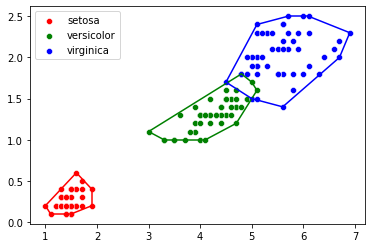

In [50]:
iris = load_iris(as_frame=True)
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['species']= iris.target

names = iris.target_names
colors = ['r','g','b']

for i in range(len(names)):
    bucket = data.loc[data.species==i, ['petal length (cm)', 'petal width (cm)']].values
    hull = ConvexHull(bucket)
    sns.scatterplot(bucket[:,0], bucket[:,1], label = names[i], color = colors[i])

    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])


5
6
7
4
8
3


c:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\vitor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\vitor\anacond

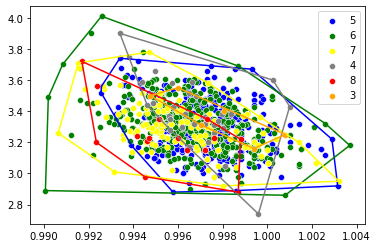

In [51]:
wine = pd.read_csv('WineQT.csv')
target_names = wine['quality'].unique()
colors = ['blue', 'green', 'yellow', 'gray', 'red', 'orange']

for i in range(len(target_names)):
    bucket = wine.loc[wine.quality==target_names[i], ['density','pH']].values
    hull = ConvexHull(bucket)
    print(target_names[i])
    sns.scatterplot(bucket[:,0],bucket[:,1], label= target_names[i], color=colors[i])

    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])

A margem é a menor distância entre os pontos de treino e a fronteira de decisão.
Quanto maior a margem, maior o potencial de generalização
no entanto a margem máxima nem sempre indicará o melhor modelo, se existir algum outlier a divisão pode ser modificada, como o exemplo abaixo:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/da32de74-064a-43a7-98cc-366a348fe275.PNG width=500>

A margem "suave" é uma forma de regularização do classificador de margem fixa. Essencialmente, ela adiciona **variáveis de afrouxamento** na função de perda do a ser otimizada, de modo a permitir que alguns **erros de classificação** sejam cometidos na base de treino, com o intuito de ganhar certo grau de generalização para novos dados. O grau de afrouxamento (*slack variables*) é guiado pelo hiperparâmetro *C*, de forma semelhante ao realizado para regularizações lineares. Uma possível solução para o problema anterior seria algo:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/cfacd48d-9713-4bec-9fd7-ea1b4ae380f5.PNG width=400>

Neste caso, temos duas observações incorretas dentro da margem - e está tudo bem, pois dados que estas observações são outliers, não precisamos mos preocupar em ajustar a margem a elas.

Com isso, temos um modelo com um **viés um pouco maior, mas com variância bem menor.**

> Um classificador de margem suave é também chamado de **classificador de vetores de suporte (Support Vector Classifier)**. Os pontos que apoiam a margem são os **vetores de suporte (support vectors)**.